---

#[EDA & Regression - 부동산 데이터](https://)

---

#[1) Library & Data Import](https://)

In [42]:
#https://hyemin-kim.github.io/2020/08/11/E-Python-LinearRegression-1/

#도표, 그래프, 그림, 소리, 애니메이션 등과 같은 산출물을 브라우저 내부(Inline)에 그려지도록 하는 코드
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#경고 메시지를 무시하고 싶을 때
import warnings
warnings.filterwarnings('ignore')

In [43]:
#사용할 데이터셋 – Boston Housing Dataset
#분석에 사용될 데이터셋은 Boston Housing 1970 데이터의 일부 변수를 추출한 데이터
#여기에 미국 매사추세츠주 92개 도시(TOWN)의 506개 지역의 주택 가격 및 기타 지역 특성 데이터가 포함되어 있음(Dataset Introduction)

df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")
df.head()

#Feature Description
#각 변수의 의미 - TOWN: 소속 도시 이름

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


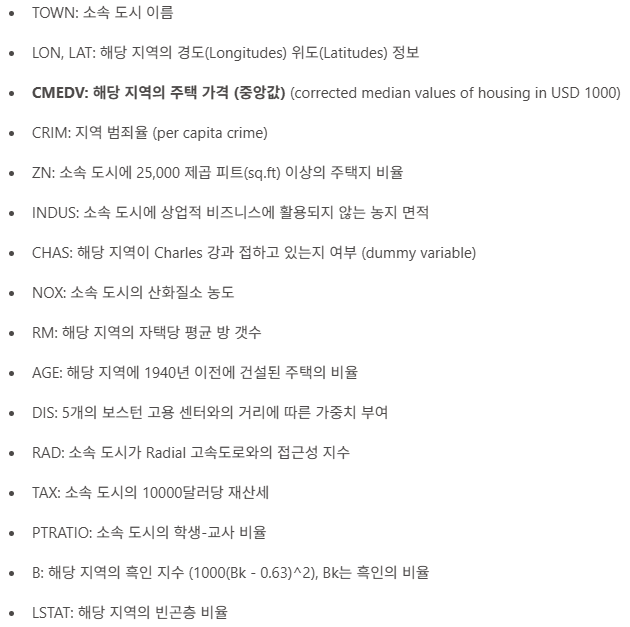

---

#[2) 데이터 파악 (EDA: 탐색적 데이터 분석)](https://)
- 데이터셋의 기본 정보 및 [각 변수의 특성을 파악](https://)
- Seaborn의 [set_style 메서드](https://) - 그래프 배경 설정
>- 그래프의 전체적인 스타일을 변경하는 데 사용
>- 이 메서드를 사용하면 그래프의 배경, 그리드선, 테두리, 폰트 스타일 등을 조정할 수 있음
>- set_style 메서드로 바꿀 수 있는 스타일은 [darkgrid, whitegrid, dark, white, ticks](https://)가 있음

In [44]:
sns.set_style('darkgrid')



---



In [45]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

#sns 내장 데이터셋
#Seaborn 제공 예제 데이터셋 목록:anscombe/attention/brain_networks/car_crashes/diamonds/dots/exercise/flights/fmri/gammas/geyser/iris/mpg/penguins/planets/tips/titanic/

#Palmer Penguins 데이터셋으로, 남극의 세 종의 펭귄(Adelie, Chinstrap, Gentoo)의 신체 측정값을 기반으로 펭귄 종을 분류하는 문제에 자주 사용
#df = sns.load_dataset('penguins')

#sns.set_style('dark')
#sns.boxplot(data=df, x='species', y='body_mass_g')

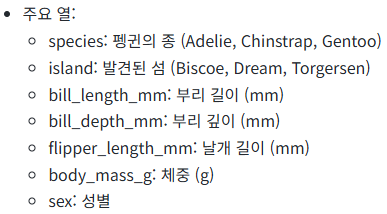



---



## [데이터셋 기본 정보 파악](https://)

In [46]:
#shape (dimension)
df.shape

(506, 17)

In [47]:
#결측치 - 데이터셋은 총 506개의 관측치(observations)과 17개의 변수(variables)로 구성되어 있고 결측치는 존재하지 않음
df.isnull().sum()

,0
TOWN,0
LON,0
LAT,0
CMEDV,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0




---



## [각 변수의 타입 및 기초 통계량 (범주형 변수는 범주 구성)을 확인](https://)

In [48]:
#TOWN(소속 도시 이름)만 문자형 변수이고, 이를 제외한 모든 변수가 숫자형 변수
#data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


In [49]:
#numerical variable
df.describe()

,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,-71.056389,42.216440,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,0.075405,0.061777,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,-71.289500,42.030000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,-71.093225,42.180775,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,-71.052900,42.218100,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,-71.019625,42.252250,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,-70.810000,42.381000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000




---



In [50]:
#categorical variable
num_town = df['TOWN'].unique()
print(len(num_town))

num_town

92


array(['Nahant', 'Swampscott', 'Marblehead', 'Salem', 'Lynn', 'Sargus',
       'Lynnfield', 'Peabody', 'Danvers', 'Middleton', 'Topsfield',
       'Hamilton', 'Wenham', 'Beverly', 'Manchester', 'North Reading',
       'Wilmington', 'Burlington', 'Woburn', 'Reading', 'Wakefield',
       'Melrose', 'Stoneham', 'Winchester', 'Medford', 'Malden',
       'Everett', 'Somerville', 'Cambridge', 'Arlington', 'Belmont',
       'Lexington', 'Bedford', 'Lincoln', 'Concord', 'Sudbury', 'Wayland',
       'Weston', 'Waltham', 'Watertown', 'Newton', 'Natick', 'Framingham',
       'Ashland', 'Sherborn', 'Brookline', 'Dedham', 'Needham',
       'Wellesley', 'Dover', 'Medfield', 'Millis', 'Norfolk', 'Walpole',
       'Westwood', 'Norwood', 'Sharon', 'Canton', 'Milton', 'Quincy',
       'Braintree', 'Randolph', 'Holbrook', 'Weymouth', 'Cohasset',
       'Hull', 'Hingham', 'Rockland', 'Hanover', 'Norwell', 'Scituate',
       'Marshfield', 'Duxbury', 'Pembroke', 'Boston Allston-Brighton',
       'Boston Bac



---



## [종속 변수(목표 변수) 탐색](https://)
- [Target Variable - ‘CMEDV’(주택 가격) 탐색](https://)

In [51]:
#각 변수의 특성을 시각화 도구를 통해 파악
#예측하고자 하는 대상, 즉 회귀 모델의 종속 변수인 “주택 가격”(‘CMECV’) 부터 확인
#기초 통계량

df['CMEDV'].describe()

,CMEDV
count,506.000000
mean,22.528854
std,9.182176
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000




---



## [분포- hist](https://)

<Axes: >

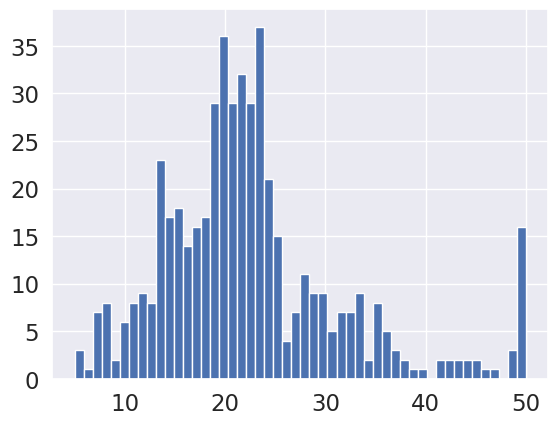

In [52]:
#CMEDV(해당지역의 집값) 컬럼의 hist를 확인하고 막대를 50개로 나눔
df['CMEDV'].hist(bins=50)



---



## [분포- boxplot - Pandas](https://)
- [Box Plot이란? ](https://)
>- [값들의 분포를 시각화하는 도구](https://)
>>- 백분위[ 기준 25 위치를 박스 하단, 75 위치를 박스 상단으로한 박스를 그림](https://)
>>- [중앙값을 박스안에 가로선으로 그리고 Min값과 Max값은 박스 바깥쪽 위와 아래에 가로선을 그림](https://)
>>- 얼마나 [넓게 분포하는지 특정부분에 몰려있는지](https://) 등을 쉽게 파악할 수 있음

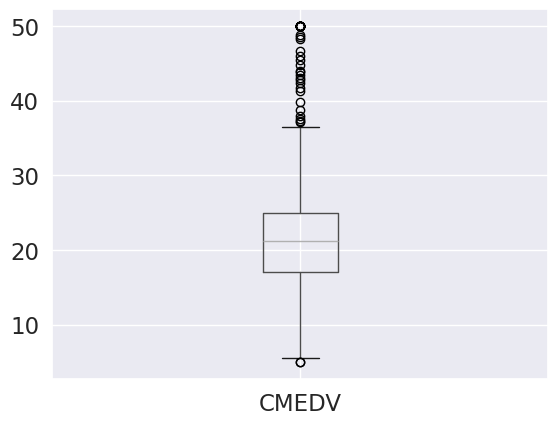

In [53]:
#boxplot - Pandas
df.boxplot(column=['CMEDV']) #https://m.blog.naver.com/wideeyed/221533665694
plt.show()

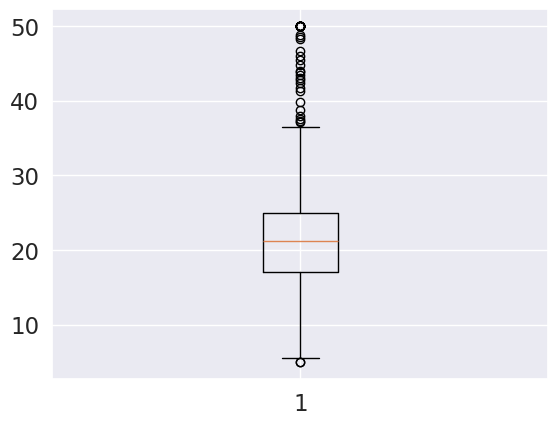

In [54]:
# boxplot - matplotlib
plt.boxplot(df['CMEDV'])
plt.show()

#주택 가격이 대부분 $17,000 ~ $25,000 사이에 분포되어 있으며, 소수의 $40,000 이상인 고가 주택도 존재



---



## [설명 변수 탐색](https://)

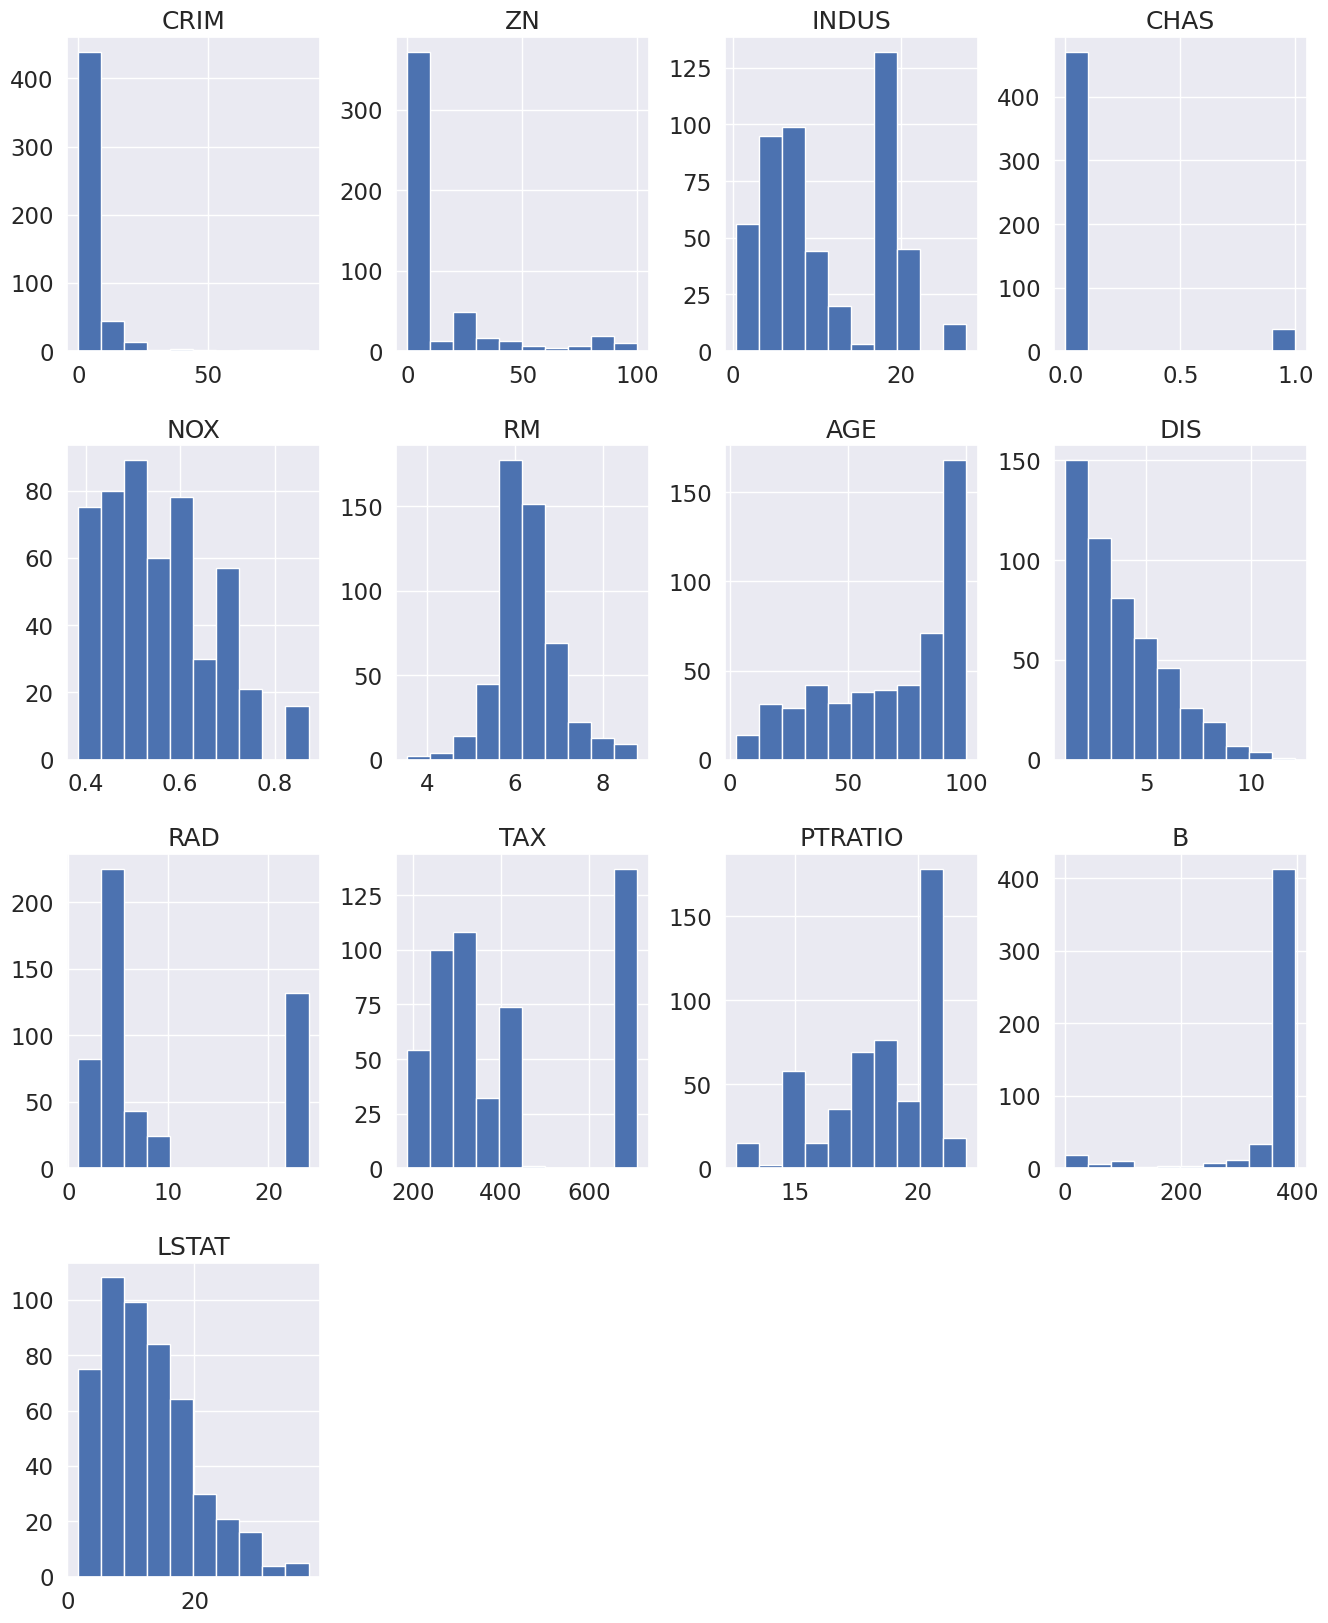

In [55]:
#설명 변수의 분포 탐색
# numerical features (except "LON" & "LAT")
numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
fig = plt.figure(figsize = (16, 20))

ax = fig.gca()  # Axes 생성 - matplotlib에서 현재 Figure의 Axes 객체를 가져와서 ax 변수에 할당
df[numerical_columns].hist(ax=ax) #데이터프레임 df의 숫자형 컬럼들(numerical_columns)에 대해 히스토그램을 그려서 ax 변수에 지정된 Axes 객체에 표시
plt.show()



---



## [설명변수와 종속변수 간의 관계 탐색](https://)

In [56]:
#변수간의 상관계수 파악
#변수간의 상관계수를 추출
# Person 상관계수
cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

corr = df[cols].corr(method = 'pearson') #두 변수의 선형 상관 관계를 계량화한 수치
#결과값은 -1 ~ 1 사이의 값이며, 양의 상관 관계가 있을수록 1에 가깝고, 음의 상관 관계가 있을수록 -1에 가까움
#상관 관계가 없을수록 0에 가까움
corr

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CMEDV,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655,0.334861,-0.740836
CRIM,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.377999,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249315,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.384766,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676




---



## [상관계수를 좀 더 직관적인 Heatmap으로 표현](https://)

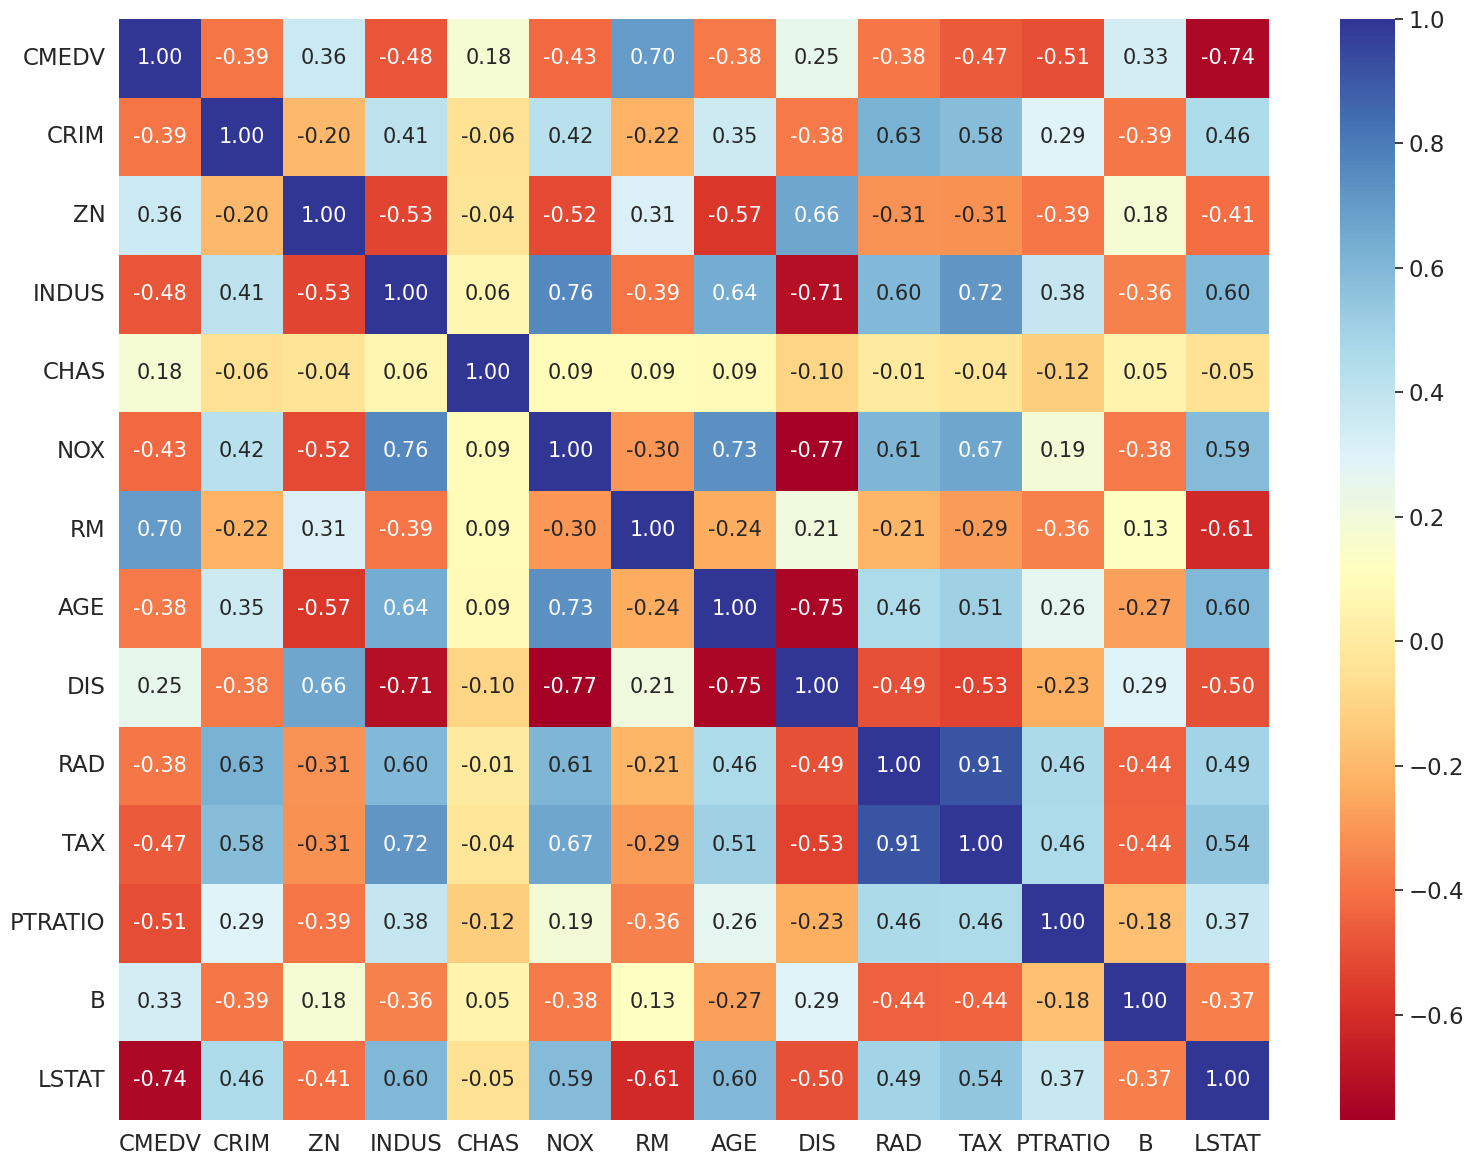

In [57]:
# heatmap (seaborn)
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()
#target variable -“CMEDV - 주택 가격과 다른 변수간의 상관관계를 살펴보면,
#“CMEDV - 주택 가격”은 “RM - 자택당 평균 방 갯수”(0.7) 및 “LSTAT - 빈곤층의 비율”(-0.74)과
#강한 상관관계를 보이고 있다는 것을 알 수 있음



---



## [종속 변수와 설명 변수간의 관계 탐색](https://)
- 주택 가격 ( “CMEDV” ) ~ 방 갯수 ( “RM” )
>- 주택 가격이 방 갯수와 양의 상관관계(positive correlation)를 갖고 있음
>- 즉, 방 갯수가 많은 주택들이 상대적으로 더 높은 가격을 갖고 있음

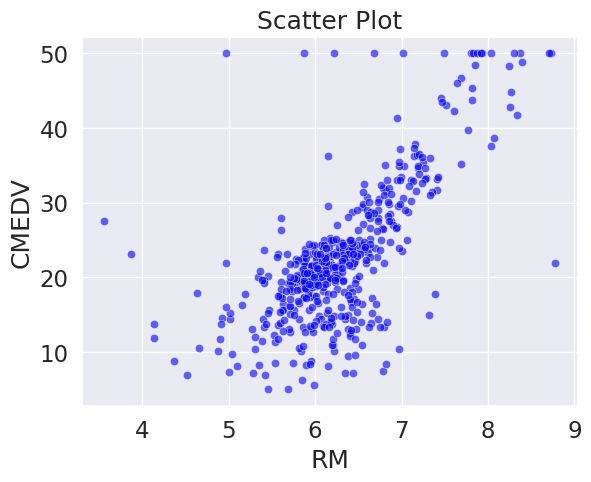

In [58]:
sns.scatterplot(data=df, x='RM', y='CMEDV', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()



---



## [종속 변수와 설명 변수간의 관계 탐색](https://)
- 주택 가격(“CMEDV”) ~ 빈곤층의 비율(“LSTAT”)
>- 주택 가격이 빈곤층의 비율과 음의 상관관계(negative correlation)를 갖고 있음
>- 즉, 빈곤층의 비율이 높은 지역의 주택 가격이 상대적으로 낮은 경향이 있음

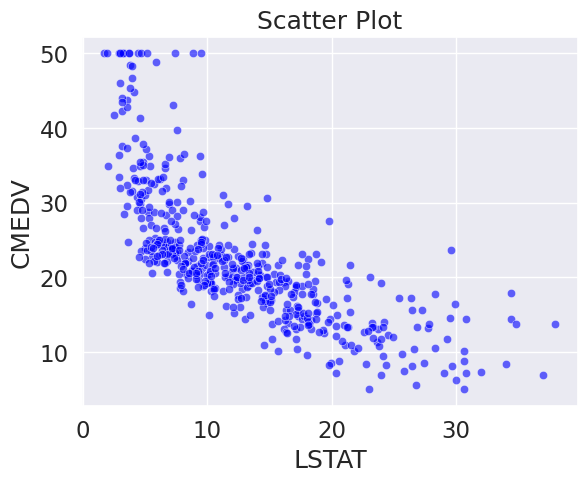

In [59]:
sns.scatterplot(data=df, x='LSTAT', y='CMEDV', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()



---



## [도시별 차이 탐색](https://)
- 데이터를 살펴보면 여러 지역이 같은 도시에 속한 경우가 있음
- 변수 중에서도 도시 단위로 측정되는 변수가 많음
- 각 도시의 데이터 갯수부터 파악

In [60]:
df['TOWN'].value_counts()

,count
TOWN,
Cambridge,30
Boston Savin Hill,23
Lynn,22
Boston Roxbury,19
Newton,18
...,...
Duxbury,1
Hull,1
Hanover,1




---



<Axes: >

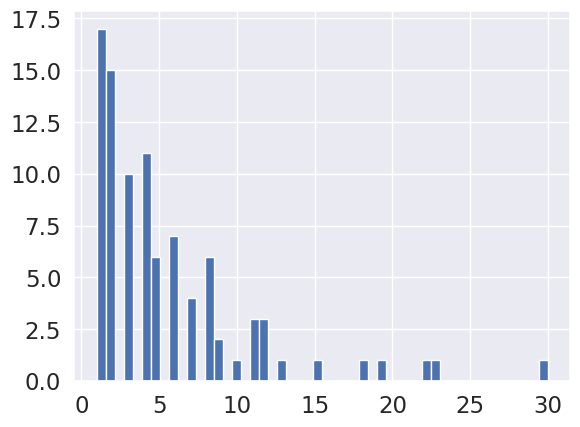

In [61]:
#도시별 데이터 갯수 (bar plot)
df['TOWN'].value_counts().hist(bins=50)



---



<Axes: xlabel='CMEDV', ylabel='TOWN'>

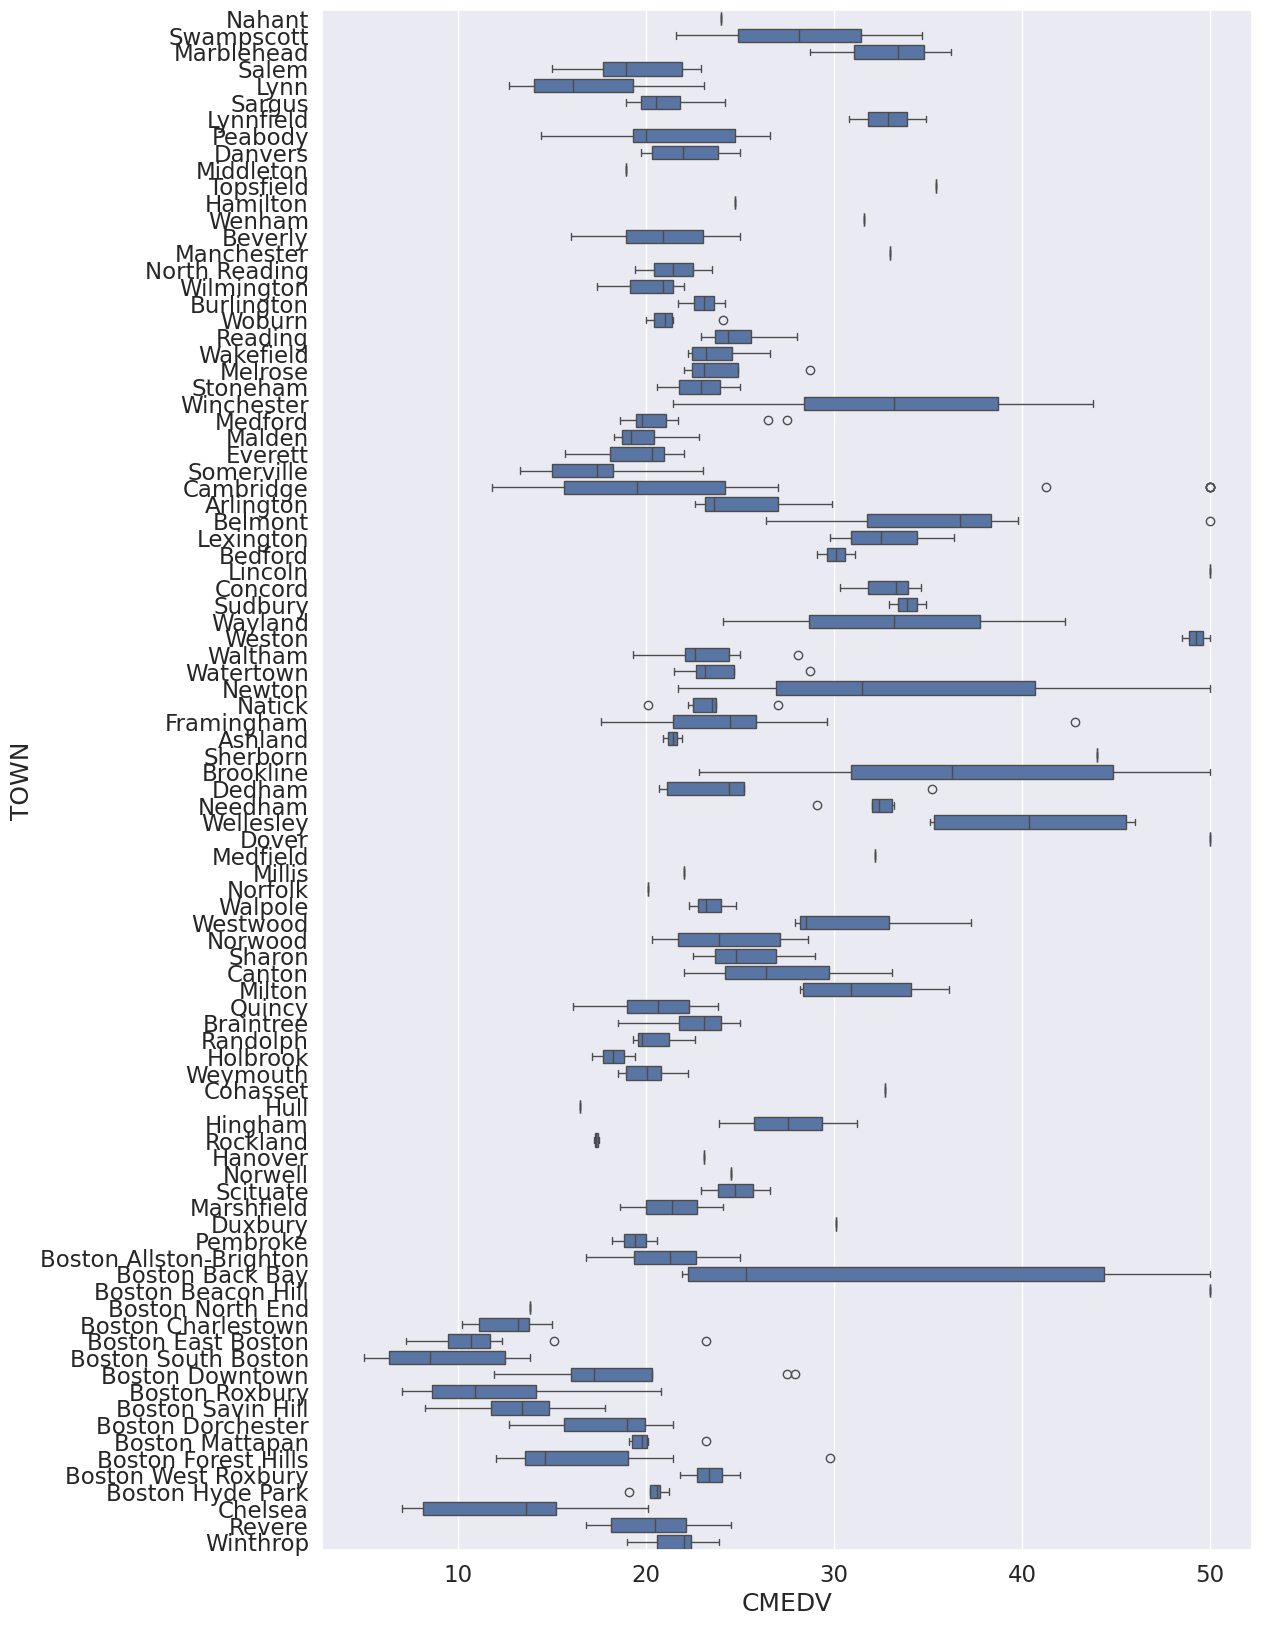

In [62]:
# 도시별 주택 가격 특징 (boxplot 이용)
fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='CMEDV', y='TOWN', data=df)



---



<Axes: xlabel='CRIM', ylabel='TOWN'>

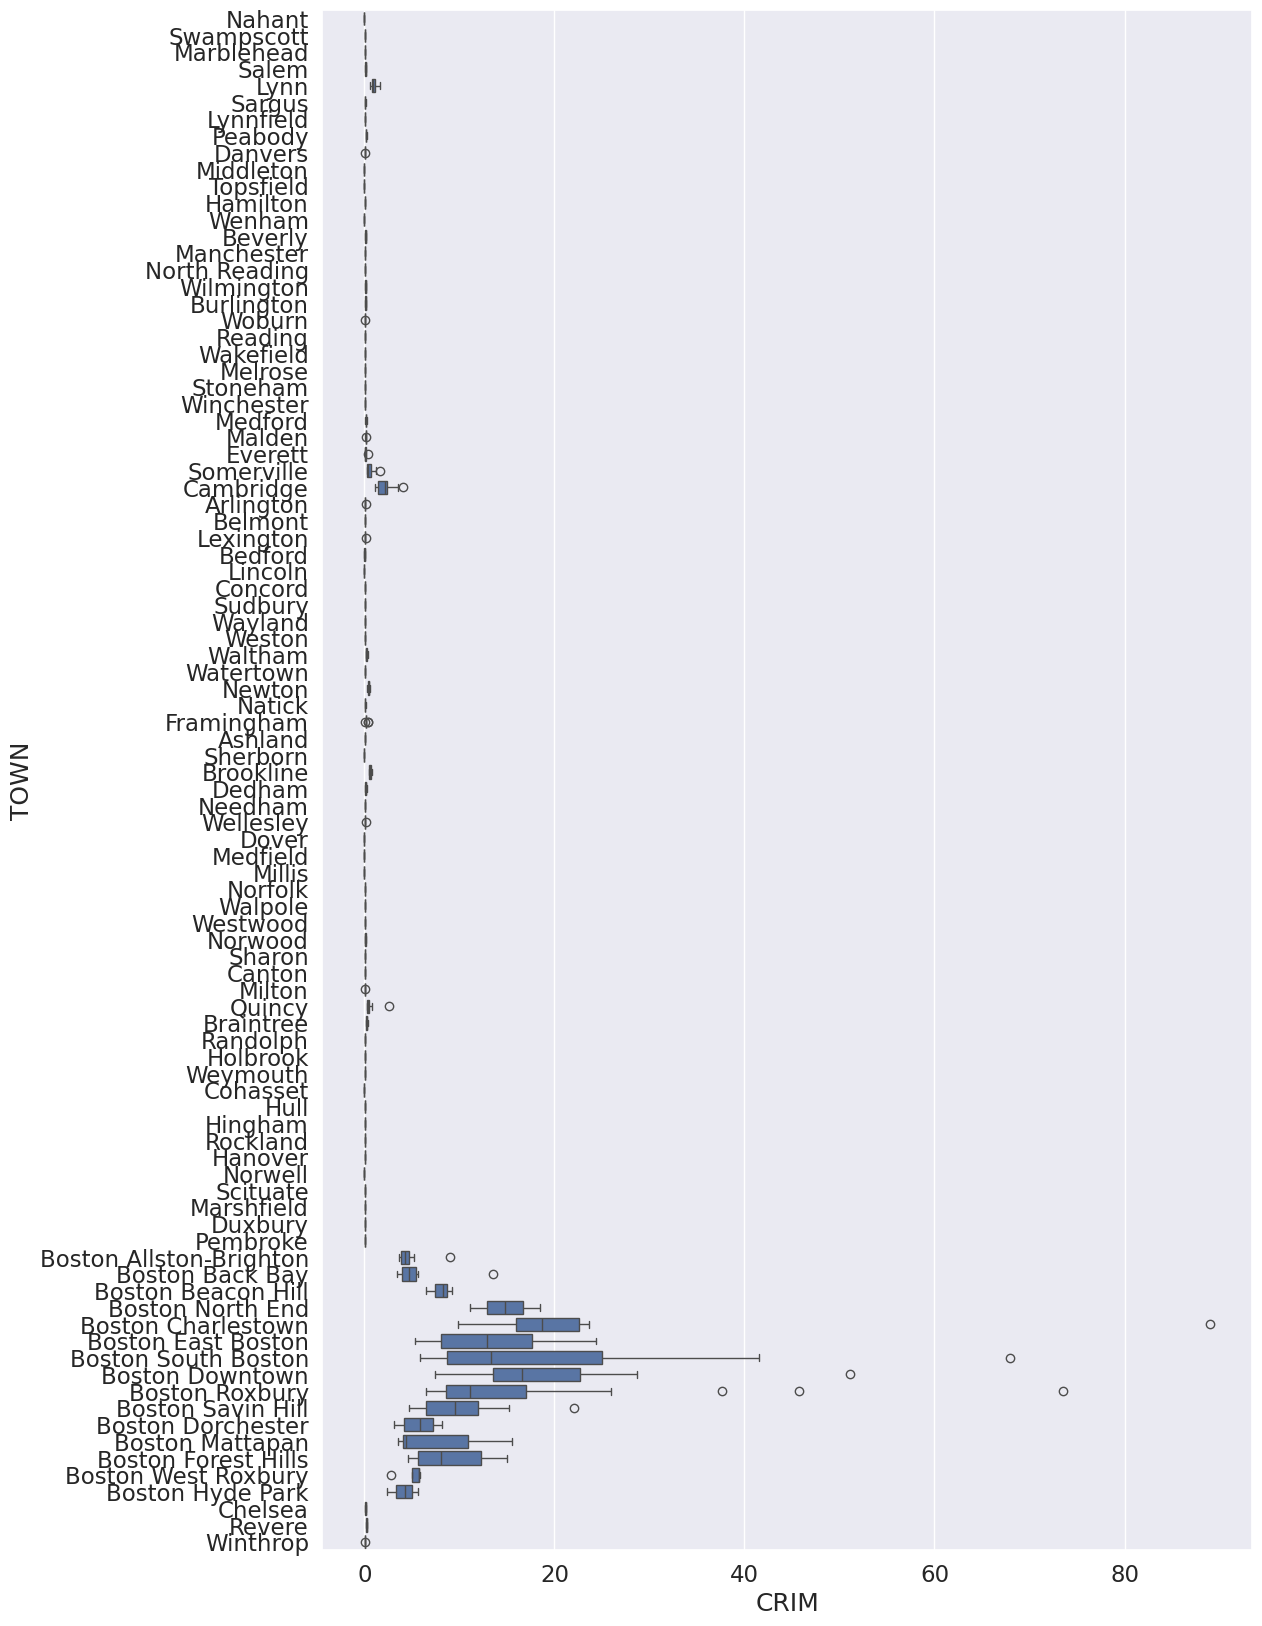

In [63]:
# 도시별 범죄율 특징
fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='CRIM', y='TOWN', data=df)

---

#[3) 주택 가격 예측 모델링 - 회귀 분석](https://)
- 변수들을 활용하여 매사추세츠주 각 지역의 주택 가격을 예측하는 회귀 모델을 만듬
- 데이터 전처리
- Feature 표준화
- Feature 들의 scale 차이를 없애기 위해 수치형 Feature에 대해서 표준화를 진행

In [64]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33




---



In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB




---



## [문자형 변수인 "TOWN"와 범주형 변수인 “CHAS” (Dummy variable)를 제외하여 모든 수치형 변수에 대해서 표준화를 진행](https://)

In [66]:
from sklearn.preprocessing import StandardScaler

# feature standardization  (numerical_columns except dummy var.-"CHAS")
scaler = StandardScaler()  # 평균 0, 표준편차 1
scale_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scale_columns] = scaler.fit_transform(df[scale_columns])
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.950,42.2875,21.6,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.936,42.2830,34.7,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.928,42.2930,33.4,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.922,42.2980,36.2,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501




---



##[ Training set / Test set 나누기](https://)

In [67]:
#나중에 도출될 예측 모델의 예측 성능을 평가하기 위해, 먼저 전체 데이터셋을 "Training set"과 "Test set"으로 나눔
#Training set에서 모델을 학습하고 Test set에서 모델의 예측 성능을 검증
#features for linear regression model
df[numerical_columns].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501




---



In [68]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = df[numerical_columns]
y = df['CMEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #test_size=0.2로 지정하면 전체 데이터셋의 20%를 테스트 데이터셋으로 사용

# random_state 인자는 수행시마다 동일한 결과를 얻기 위해 적용
X_train.shape, y_train.shape

((404, 13), (404,))



---



In [69]:
X_test.shape, y_test.shape

((102, 13), (102,))



---



## [다중공선성](https://)
- 회귀 분석에서 [하나의 feature(예측 변수)가 다른 feature와의 상관 관계가 높으면(즉, 다중공선성이 존재하면),회귀 분석 시 부정적인 영향을 미칠 수 있기 때문에, 모델링하기 전에 먼저 다중공선성의 존재 여부를 확인해야함](https://)
- 보통 다중공선성을 판단할 때[ VIF값을 확인](https://)
- 일반적으로,[ VIF > 10인 feature들은 다른 변수와의 상관관계가 높아, ](https://)다중공선성이 존재하는 것으로 판단함

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

#VIF값을 확인해보면, 모든 변수의 VIF값이 다 10 이하임
#따라서 다중공선성 문제가 존재하지 않아 모든 feature을 활용하여 회귀 모델링을 진행하면 됨

,features,VIF Factor
0,CRIM,1.7
1,ZN,2.5
2,INDUS,3.8
3,CHAS,1.1
4,NOX,4.4
5,RM,1.9
6,AGE,3.2
7,DIS,4.2
8,RAD,8.1
9,TAX,9.8




---



# [회귀 모델링](https://)

In [71]:
#먼저 Training set에서 선형 회귀 예측 모델을 학습
#그 다음 도출된 모델을 Test set에 적용해 주택 가격(“CMEDV”)을 예측
#이 결과는 다중에 실제 “CMEDV” 값과 비교하여 모델의 예측 성능을 평가하는 데 활용하게 됨

from sklearn import linear_model
#fit regression model in training set

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)



---



# [모델 해석 - coefficients(회귀 계수) 확인하기](https://)

In [72]:
#먼저 각 feature의 회귀 계수를 확인

print(lr.coef_)

[-0.9479409   1.39796831  0.14786968  2.13469673 -2.25995614  2.15879342
  0.12103297 -3.23121173  2.63662665 -1.95959865 -2.05639351  0.65670428
 -3.93702535]




---



In [73]:
# "feature - coefficients" DataFrame 만들기
coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

,feature,coefficients
0,CRIM,-0.947941
1,ZN,1.397968
2,INDUS,0.147870
3,CHAS,2.134697
4,NOX,-2.259956
5,RM,2.158793
6,AGE,0.121033
7,DIS,-3.231212
8,RAD,2.636627
9,TAX,-1.959599




---



In [74]:
#크기 순서로 나열
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
12,LSTAT,-3.937025
7,DIS,-3.231212
8,RAD,2.636627
4,NOX,-2.259956
5,RM,2.158793
3,CHAS,2.134697
10,PTRATIO,-2.056394
9,TAX,-1.959599
1,ZN,1.397968
0,CRIM,-0.947941




---



# [coefficients 시각화](https://)

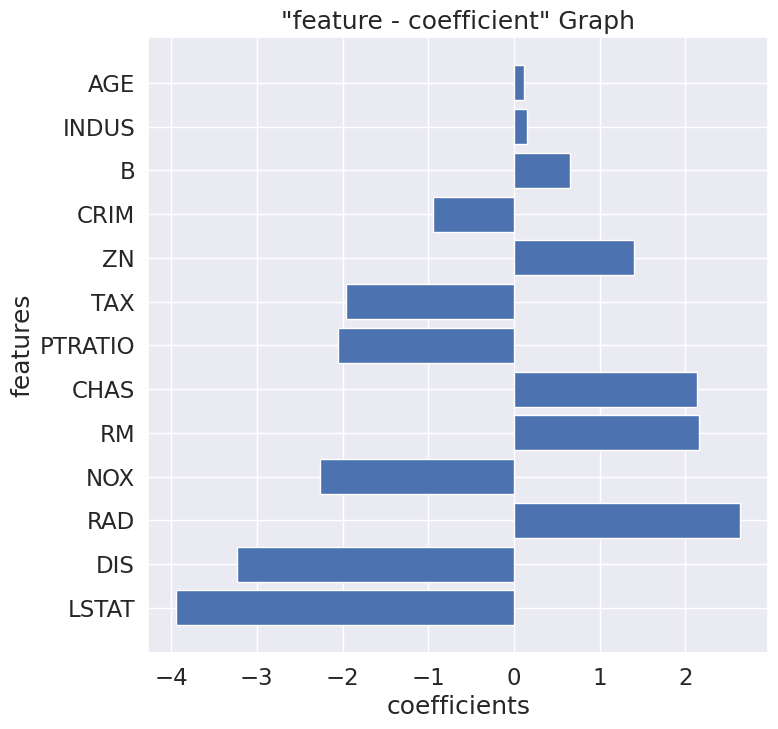

In [75]:
# figure size
plt.figure(figsize = (8, 8))

# bar plot
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()



---



# [feature 유의성 검정](https://)
- 유의성 검정은 표본 데이터를 기반으로 [모집단 모수에 대한 귀무 가설을 기각할 수 있는 충분한 증거가 있는지를 판단하기 위해 사용되는](https://) 통계적 테스트
>- 예를들어, 주택 가격 영향 요소에 관하여  "INDUS"(상업적 비즈니스에 활용되지 않는 농지 면적)과 “AGE”(1940년 이전에 건설된 비율)은 유의하지 않음(p value > 0.05)

In [76]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)

model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     82.86
Date:                Thu, 29 May 2025   Prob (F-statistic):          1.72e-103
Time:                        12:09:08   Log-Likelihood:                -1191.9
No. Observations:                 404   AIC:                             2412.
Df Residuals:                     390   BIC:                             2468.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4313      0.245     91.399      0.000      21.949      22.914
CRIM          -0.9479      0.290     -3.263      0.001      -1.519      -0.377
ZN             1.3980      0.372      3.758      0.000       0.667       2.129
INDUS          0.1479      0.458      0.323      0.747      -0.753       1.049
CHAS           2.1347      0.899      2.375      0.018       0.367       3.902
NOX           -2.2600      0.490     -4.617      0.000      -3.222      -1.298
RM             2.1588      0.332      6.495      0.000       1.505       2.812
AGE            0.1210      0.415      0.292      0.771      -0.695       0.937
DIS           -3.2312      0.477     -6.774      0.000      -4.169      -2.293
RAD            2.6366      0.671      3.931      0.000       1.318       3.955
TAX           -1.9596      0.731     -2.679      0.008      -3.398      -0.522
PTRATIO       -2.0564      0.319     -6.446      0.000      -2.684      -1.429
B              0.6567      0.272      2.414      0.016       0.122       1.191
LSTAT         -3.9370      0.405     -9.723      0.000      -4.733      -3.141
==============================================================================
Omnibus:                      169.952   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.012
Skew:                           1.762   Prob(JB):                    2.94e-187
Kurtosis:                       9.213   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



---



# [모델 예측 결과 및 성능 평가](https://)

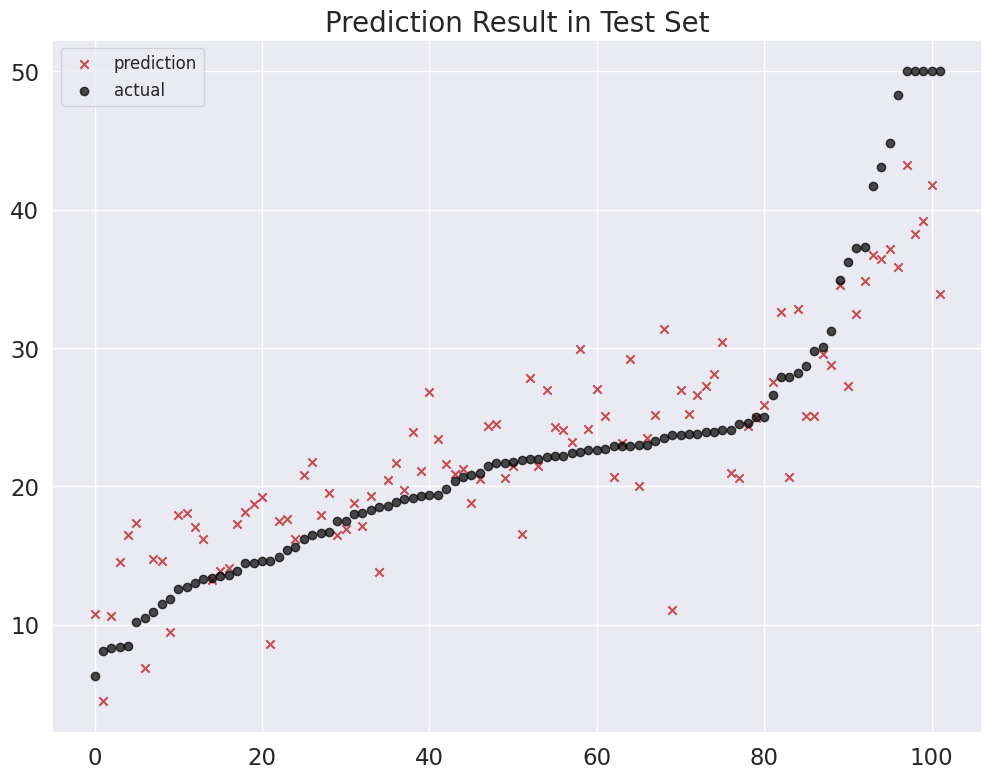

In [77]:
#학습한 모델을 Test set에 적용하여 y값(“CMEDV”)을 예측.
#예측 결과를 확인하기 위해 실제값과 예측값을 한 plot에 출력해 시각화
# 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()



---



# [모델 성능 평가](https://)
- 모델의 예측 성능을 평가하기 위해 모델의 [R square과 RMSE를 계산](https://)



---



## [R2(R-squared)](https://)
- [독립 변수가 종속 변수를 얼마나 잘 설명하는지 보여주는 지표](https://)
>- 쉽게 말하면, 모델로 만들어진 회귀식이 얼마나 잘 예측(설명) 하는지에 대한 지표
>- 범위는 0 ~ 1 사이의 값으로, 1이면 오차가 없는 것(다 맞춤) / 0 이면 전혀 예측을 못하는 것(= 평균으로 찍어도 같음)
>- 음수면 평균으로 예측하는 것보다 예측을 못하는 것
>- [0.1 이면 10% 설명력, 0.9면 90% 설명력을 가지고 있다고 말함](https://)

In [78]:
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.7341832055169145
0.763957915736642




---



## [RMSE(Root Mean Square of Errors) 평균제곱오차제곱근](https://)
- 실제값과 예측값의 차이를 나타내는 척도
>- 실제값에서 예측값을 뺀 뒤 제곱한 것의 평균의 루트 값
>- 쉽게 말하면, [예측한 값이 실제값하고 얼마나 차이있는 지를 볼 수 있는 척도](https://)
>- 추가로 오차를 제곱한 것을 평균냈기 때문에 [더 많이 틀린 오차에 대해 더 많은 패널티를 줌](https://)
>>- 즉, 타겟의 값들과 비교해서 많이 틀린 오차들이 얼마나 있는 지에 대해 알 수 있음
>>- 톡톡 뒤는 값들이 많을 때 숫자가 높게 나오는 경향이 있음

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

#test set
print(sqrt(mean_squared_error(y_test, pred_test)))

4.6240517608403335
4.82984709817656




---





---



In [80]:
rating_example=[[4, 3.5], [5, 5], [0.5, 1], [3, 5]]
rating_example = pd.DataFrame(rating_example, columns=['Actual', 'Predict'])

In [81]:
import numpy as np

# 오차 계산: error = Actual - Predict
rating_example['error'] = rating_example['Actual'] - rating_example['Predict']

# 오차의 제곱 계산: squared error: +와 -가 캔슬되는 것을 막기 위해서
rating_example['squared error'] = rating_example['error'] ** 2

# 평균 오차 계산(mse)
mse = rating_example['squared error'].mean()

# 평균 제곱근 오차 계산(rmse):
rmse = np.sqrt(mse)

print(rmse)

1.0606601717798212


RMSE는 근본적으로 에러에 대한 합을 계산한 것이기 때문에, 작을수록 예측력이 좋다고 할 수 있습니다. 그럼 5684는 작은편에 속할까요, 큰편에 속할까요? 안타깝게도 RMSE를 평가하는 절대적인 기준은 없습니다. 이는 데이터의 특성에 따라 천차만별로 달라질 수 있기 때문에, 어느 수준 이하면 좋은 예측을 보인다는 등의 말을 하기가 어렵습니다. 그래서 RMSE는 절대 평가보다는 상대 평가에 사용합니다. 앞으로 다양한 알고리즘과 활용법을 배울 텐데, 같은 데이터에 여러 가지 모델링을 해보고, 그중 어떤 모델이 가장 뛰어난 예측력을 보이는지를 판단할 때 RMSE가 가장 낮은 모델을 선택하면 됩니다.